In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mineralML as mm
import Thermobar as pt
import os


In [3]:
mm.__version__

'0.0.0.5'

In [4]:
pt.__version__

'1.0.49'

## To extract data

In [6]:
result = pt.process_excel_file(os.path.join(os.getcwd(),'Kam_Nov1st_EDS.xlsx'), sheet_name="Olivines_KAMI1")
sorted_df = pt.sort_columns(result)
sorted_df['SampleID']=sorted_df['Sample Name']
sorted_df['Date']='Nov1_2024'
sorted_df.to_clipboard(excel=True)
sorted_df.head()


,Sample Name,Total_wt%,Total_Oxide%,CaO,Cr2O3,FeOt,MgO,MnO,NiO,SiO2,...,#_ions__O,#_ions__Mg,#_ions__Si,#_ions__Ca,#_ions__Cr,#_ions__Mn,#_ions__Fe,#_ions__Ni,SampleID,Date
0,AMG_XEN4_ol3,100.0536,100.0536,0.2192,0.0426,11.9042,46.9345,0.1514,0.4101,40.3916,...,2,0.87,0.5,0.00,0,0,0.12,0,AMG_XEN4_ol3,Nov1_2024
1,AMG_XEN4_ol3_WDS,100.0124,100.0124,0.2192,0.0426,11.9054,46.9202,0.1514,0.3858,40.3877,...,2,0.87,0.5,0.00,0,0,0.12,0,AMG_XEN4_ol3_WDS,Nov1_2024
2,KA611_c217_MIA_ol3,99.7586,99.7586,0.4559,0.0296,13.9559,45.0261,0.2040,0.2949,39.7923,...,2,0.84,0.5,0.01,0,0,0.15,0,KA611_c217_MIA_ol3,Nov1_2024
3,KA611_c217_MIA_ol3_WDS,99.7646,99.7646,0.4559,0.0296,13.9557,45.0281,0.2040,0.2985,39.7929,...,2,0.84,0.5,0.01,0,0,0.15,0,KA611_c217_MIA_ol3_WDS,Nov1_2024
4,KA69_c201_MI1_ol3,99.4246,99.4246,0.3633,0.0434,15.7002,43.5743,0.2265,0.1520,39.3650,...,2,0.82,0.5,0.00,0,0,0.17,0,KA69_c201_MI1_ol3,Nov1_2024


## Now run through mineral ML

In [7]:
df_final=pt.minClass(sorted_df)

## Extract standards and paste into this sheet - 
 https://docs.google.com/spreadsheets/d/1V6m2yhYWO6vrLcbZ-0ccXu5zADcnHxmloiOhQwrKl8U/edit?usp=sharing

In [8]:
# Put your name and analysis date here - if it spans multiple days in a single sesion, dont worry, the first day is fine, your standards should be named mon_morn, mon_afternoon etc. anyway. 
PersonName='Charlotte'
AnalysisDate='10/4/2024'

## For each standard, write the Name, and also the string in your name 'e.g. if your san carlos are called SC, you would put StdString 'SC'
- Copy and paste these cells for as many standards as you have - p.s. right now, only works for silicates, I need to format for Other oxides. 

In [9]:
df_final['SampleID'].unique()

array(['AMG_XEN4_ol3', 'AMG_XEN4_ol3_WDS', 'KA611_c217_MIA_ol3',
       'KA611_c217_MIA_ol3_WDS', 'KA69_c201_MI1_ol3',
       'KA69_c201_MI1_ol3_WDS', 'KA71_c201_MI1_ol3',
       'KA71_c201_MI1_ol3_WDS', 'KA71_c213_MI2_ol3',
       'KA71_c213_MI2_ol3_WDS', 'KA71_c204_MI1_ol3',
       'KA71_c204_MI1_ol3_WDS', 'KA71_c215_MI1_ol3',
       'KA71_c215_MI1_ol3_WDS', 'KA78_c101_MIA_ol3',
       'KA78_c101_MIA_ol3_WDS', 'KA69_c205_MIB_ol3',
       'KA69_c205_MIB_ol3_WDS', 'KA79_c222_MIA_ol3',
       'KA79_c222_MIA_ol3_WDS', 'KA71_c204_MI1_ol4_away',
       'KA71_c204_MI1_ol4_away_WDS', 'KA71_c204_MI1_ol5_inner',
       'KA71_c204_MI1_ol5_inner_WDS'], dtype=object)

In [10]:
StdName='GOR'
StdString='GOR'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [11]:
StdName='JDFD-2'
StdString='JDFD-2'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


In [12]:
StdName='For'
StdString='Fo'
Mac_Fo=pt.extract_silicate_standard_data(df_final, PersonName, StdName, AnalysisDate, StdString)
Mac_Fo.to_clipboard(excel=True)

,AnalysisDate,PersonName,SampleID,Total_Oxide%,MgO,SiO2,TiO2,Al2O3,CaO,MnO,...,Standard Name_K,Standardization Date_K,Standard Name_Fe,Standardization Date_Fe,Standard Name_Ni,Standardization Date_Ni,Standard Name_S,Standardization Date_S,Standard Name_Cr,Standardization Date_Cr


## Compare EDS and WDS Ni

In [13]:
df=df_final
df_Ni_WDS=df.loc[df['Signal Type_Ni']=='WDS']
df_Ni_EDS=df.loc[(df['Signal Type_Ni']=='EDS')]


In [14]:
df_Ni_WDS['simplename'] = df_Ni_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
df_Ni_EDS['simplename']=df_Ni_EDS['Sample Name']

C:\Users\charl\AppData\Local\Temp\ipykernel_22108\289905960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ni_WDS['simplename'] = df_Ni_WDS['Sample Name'].astype(str).str.replace('_WDS', '', regex=False)
C:\Users\charl\AppData\Local\Temp\ipykernel_22108\289905960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ni_EDS['simplename']=df_Ni_EDS['Sample Name']


In [15]:
df_combined_WDS_EDS = pd.merge(df_Ni_WDS, df_Ni_EDS, on='simplename', how='left')

Text(0, 0.5, 'EDS NiO (wt%)')

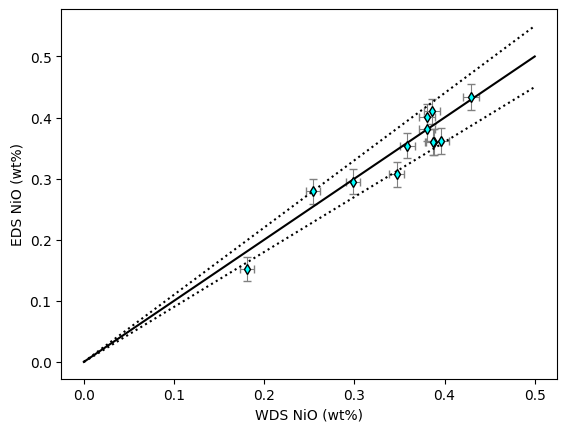

In [16]:
plt.plot(df_combined_WDS_EDS['NiO_x'],df_combined_WDS_EDS['NiO_y'], '.r' )

plt.errorbar(df_combined_WDS_EDS['NiO_x'],df_combined_WDS_EDS['NiO_y'], 
             xerr=df_combined_WDS_EDS['Oxide % Sigma_NiO_x'], yerr=df_combined_WDS_EDS['Oxide % Sigma_NiO_y'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)

plt.plot([0, 0.5], [0, 0.5], '-k')
plt.plot([0, 0.5], [0, 0.5*1.1], ':k')
plt.plot([0, 0.5], [0, 0.5*0.9], ':k')
plt.xlabel('WDS NiO (wt%)')
plt.ylabel('EDS NiO (wt%)')

Text(0, 0.5, 'EDS NiO (wt%)')

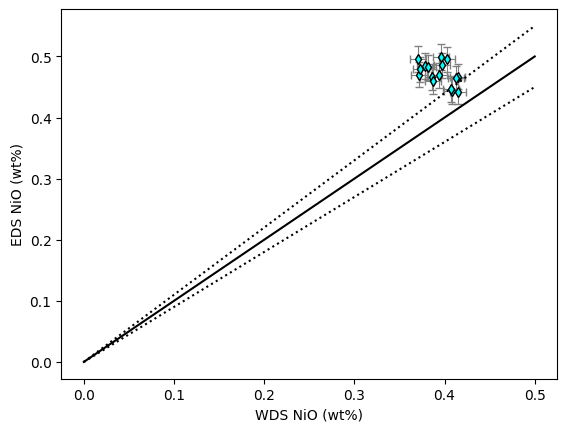

In [84]:
plt.plot(df_combined_WDS_EDS['NiO_x'],df_combined_WDS_EDS['NiO_y'], '.r' )

plt.errorbar(df_combined_WDS_EDS['NiO_x'],df_combined_WDS_EDS['NiO_y'], 
             xerr=df_combined_WDS_EDS['Oxide % Sigma_NiO_x'], yerr=df_combined_WDS_EDS['Oxide % Sigma_NiO_y'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)

plt.plot([0, 0.5], [0, 0.5], '-k')
plt.plot([0, 0.5], [0, 0.5*1.1], ':k')
plt.plot([0, 0.5], [0, 0.5*0.9], ':k')
plt.xlabel('WDS NiO (wt%)')
plt.ylabel('EDS NiO (wt%)')

In [85]:
Oliv=df_combined_WDS_EDS['Sample Name_x'].str.contains('Olivine')
Fo=df_combined_WDS_EDS['Sample Name_x'].str.contains('Fo')

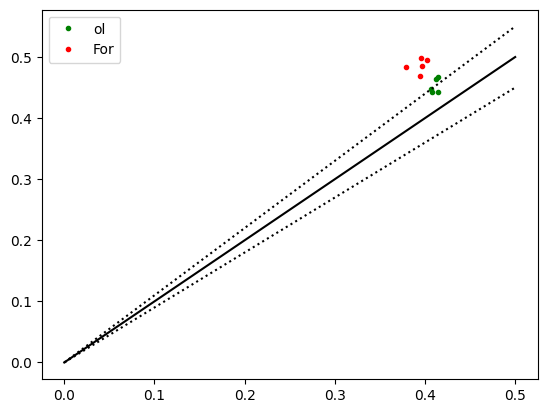

In [86]:
plt.plot(df_combined_WDS_EDS['NiO_x'].loc[Oliv],df_combined_WDS_EDS['NiO_y'].loc[Oliv], '.g' , label='ol')
plt.plot(df_combined_WDS_EDS['NiO_x'].loc[Fo],df_combined_WDS_EDS['NiO_y'].loc[Fo], '.r' , label='For')
plt.legend()
plt.plot([0, 0.5], [0, 0.5], '-k')
plt.plot([0, 0.5], [0, 0.5*1.1], ':k')
plt.plot([0, 0.5], [0, 0.5*0.9], ':k')